<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FFT_of_TriangularFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>RMS of the AC Components (Ripple) of Triangular Function</h1></b>

Dr. Bingsen Wang

12/14/2024
</center>

#Python Code


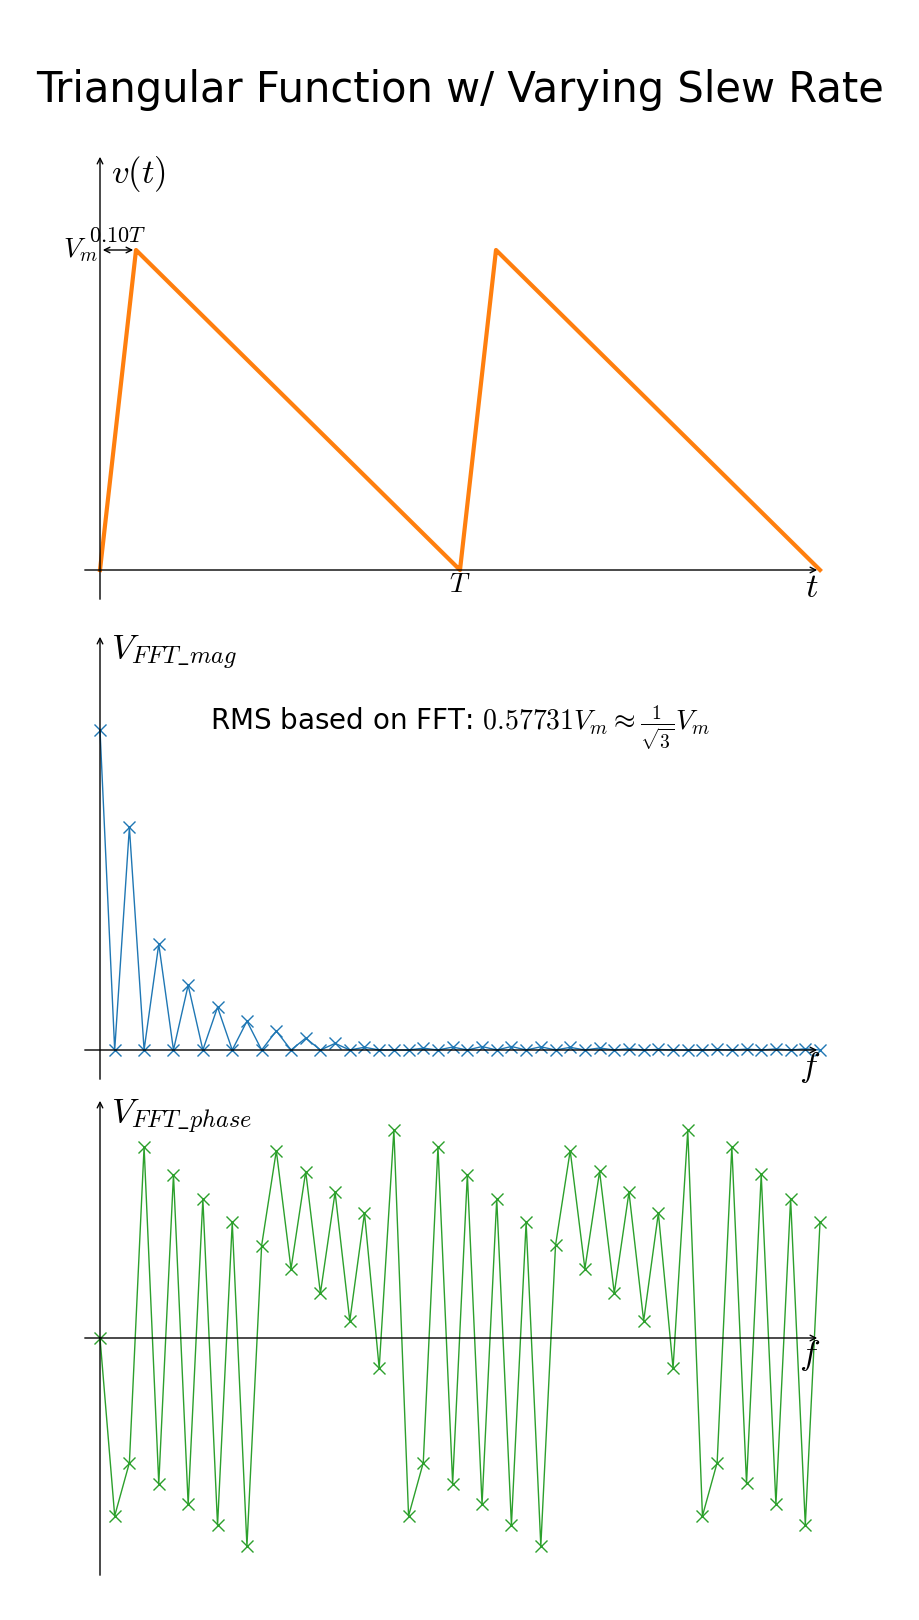

In [93]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({'font.family':"sans serif",'mathtext.fontset':'cm'})

def spectrum(xt):
  xfft = np.fft.rfft(xt)
  xfft_mag = np.abs(xfft)/len(xfft)
  xfft_mag[0]=xfft_mag[0]*0.5
  xfft_phase = np.angle(xfft)
  xrms=np.sqrt(xfft_mag[0]**2+.5*np.sum(xfft_mag[1:]**2))
  return xfft_mag,xfft_phase,xrms

def tr(t,D,T): #triangular function
  tr_rise = np.heaviside(1-(t%T)/(D*T),0)*(t%T)/(D*T)
  tr_fall = -np.heaviside((t%T)/(D*T)-1,0)*((t%T-T))/((1-D)*T)
  return  tr_rise+tr_fall

Nf = 100
t = np.linspace(0,1,1024*32)
D = np.linspace(.1,.9,Nf) # duty ratio
T = 1/2

clst = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,16]))
ax= fig.add_axes([0,0,1,1],xlim=[0,1],ylim=[0,1])
ax.axis('off')
x0,y0=[.1,.1,.1],[.65,.35,.17]
lines=[]
for i in range(3):
  if i<2:
    xn,xm,yn,ym = x0[i]-.02,x0[i]+.8,y0[i]-.02,y0[i]+.26
  else:
    xn,xm,yn,ym = x0[i]-.02,x0[i]+.8,y0[i]-.15,y0[i]+.15
  ax.annotate('',(xm,y0[i]),(xn,y0[i]),arrowprops=dict(arrowstyle='->'))
  ax.annotate('',(x0[i],ym),(x0[i],yn),arrowprops=dict(arrowstyle='->'))
  ax.text(xm,y0[i],['$t$ ','$f$ ','$f$ '][i],size=25,va='top',ha='right')
  ax.text(x0[i],ym,[' $v(t)$',' $V_{FFT\_mag}$',' $V_{FFT\_phase}$ '][i],
          size=25,va='top')
lines.append(ax.plot([],[],lw=3,c=clst[1])[0])
lines.append(ax.plot([],[],'-x',lw=1,c=clst[0],markersize=8)[0])
lines.append(ax.plot([],[],'-x',lw=1,c=clst[2],markersize=8)[0])

ax.text(.5,.95,r'Triangular Function w/ Varying Slew Rate',size=30,ha='center',va='center')
ax.text(x0[0]+.8*T,y0[0],'$T$',size=20,ha='center',va='top')
ax.text(x0[0],y0[0]+.2,'$V_m$ ',size=20,ha='right',va='center')
an_DT=ax.annotate('',(0,0),(x0[0],y0[0]+.2),arrowprops=dict(arrowstyle='<->'))
txt_DT=ax.text(0,0,'',size=16,ha='center')
txt_rms=ax.text(.5,y0[1]+.2,'',size=20,ha='center')

def animate(i):
  vt = tr(t,D[i],T)
  xfft_mag,xfft_phase,xrms= spectrum(vt)
  lines[0].set_data(t*.8+x0[0],vt*.2+y0[0])
  an_DT.xy=(x0[0]+T*D[i]*.8,y0[0]+.2)
  txt_DT.set_position((x0[0]+T*D[i]*.4,y0[0]+.205))
  txt_DT.set_text(f'${D[i]:.2f}T$')
  txt_rms.set_text(f'RMS based on FFT: ${xrms:.5f}V_m$'+r'$\approx\frac{1}{\sqrt{3}}V_m$')
  lines[1].set_data(x0[1]+np.linspace(0,.8,50),y0[1]+xfft_mag[:50]*.4)
  lines[2].set_data(x0[2]+np.linspace(0,.8,50),y0[2]+xfft_phase[:50]/np.pi*.13)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=150)
anim.save("fft_triangularWaveform.mp4", writer=animation.FFMpegWriter(fps=5), dpi=200)